<a href="https://colab.research.google.com/github/meiladrahmani556/Disso/blob/main/notebooks/02_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

DATA_DIR = "../data"

In [15]:
%%writefile kaggle.json
{
  "username": "meiladrahmani",
  "key": "KGAT_92da668157bd4281a45c8eb0fec30e6f"
}


Overwriting kaggle.json


In [16]:
!mkdir -p /root/.config/kaggle
!cp kaggle.json /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

In [17]:
!kaggle datasets list | head


ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                          Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        256  1.0              
kundanbedmutha/exam-score-prediction-dataset                      Exam Score Prediction Dataset                           325454  2025-11-28 07:29:01.047000           5863        288  1.0              
dansbecker/melbourne-housing-snapshot                             Melbourne Housing Snapshot                              461423  2018-06-05 12:52:24.087000         200095       1721  0.705882

In [18]:
!mkdir -p ../data
!kaggle datasets download -d puneet6060/intel-image-classification -p ../data --unzip


Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 76% 263M/346M [00:06<00:02, 35.9MB/s]
100% 346M/346M [00:06<00:00, 54.6MB/s]


In [19]:
import os
print(os.listdir("../data")[:20])


['seg_pred', 'seg_test', 'seg_train']


In [13]:
!mkdir -p ../data
!kaggle datasets download -d puneet6060/intel-image-classification -p ../data --unzip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [30]:
train_dir = os.path.join(DATA_DIR, "seg_train", "seg_train")

In [31]:
class_names = os.listdir(train_dir)
class_names

['sea', 'forest', 'glacier', 'mountain', 'street', 'buildings']

In [33]:
train_dir = os.path.join(DATA_DIR, "seg_train", "seg_train")
class_names = os.listdir(train_dir)

In [34]:
class_counts = {}

for cls in class_names:
    cls_path = os.path.join(train_dir, cls)
    class_counts[cls] = len(os.listdir(cls_path))

class_counts

{'sea': 2274,
 'forest': 2271,
 'glacier': 2404,
 'mountain': 2512,
 'street': 2382,
 'buildings': 2191}

In [35]:
class_counts_sorted = dict(sorted(class_counts.items(), key=lambda x: x[0]))
class_counts_sorted

{'buildings': 2191,
 'forest': 2271,
 'glacier': 2404,
 'mountain': 2512,
 'sea': 2274,
 'street': 2382}

In [36]:
sum(class_counts.values())


14034

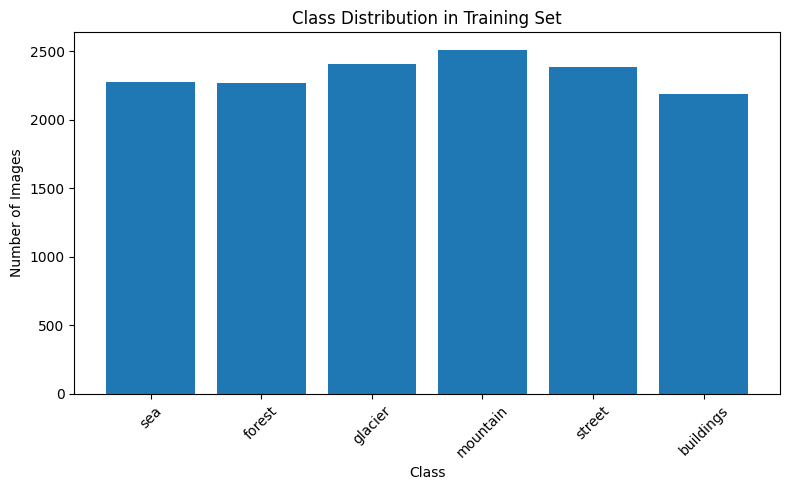

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


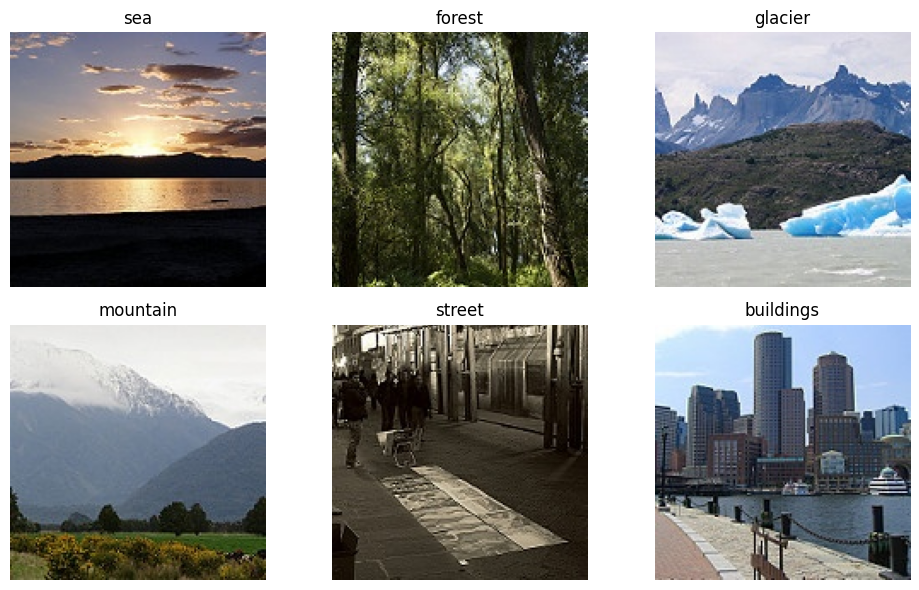

In [39]:
from PIL import Image
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i, cls in enumerate(class_names):
    cls_path = os.path.join(train_dir, cls)
    img_name = random.choice(os.listdir(cls_path))
    img_path = os.path.join(cls_path, img_name)

    img = Image.open(img_path)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [40]:
image_sizes = []

for cls in class_names:
    cls_path = os.path.join(train_dir, cls)
    img_name = random.choice(os.listdir(cls_path))
    img_path = os.path.join(cls_path, img_name)

    img = Image.open(img_path)
    image_sizes.append(img.size)

image_sizes

[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]

In [42]:
from collections import Counter

sizes = []
for cls in class_names:
    cls_path = os.path.join(train_dir, cls)
    imgs = os.listdir(cls_path)
    sample = random.sample(imgs, min(100, len(imgs)))  # 100 per class
    for img_name in sample:
        img_path = os.path.join(cls_path, img_name)
        sizes.append(Image.open(img_path).size)

Counter(sizes).most_common(5)


[((150, 150), 600)]